In [65]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# all the functions from sklearn needed for this workshop
import sklearn
from sklearn.datasets import make_moons, make_circles, load_iris, load_wine
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.tree.export import export_text
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

import pandas as pd

In [140]:
mf = pd.read_csv("morgan_fingerprints.csv") 
morgan_fingerprints = mf.to_numpy()

ps = pd.read_csv("photoswitches.csv")

df = ps['rate of thermal isomerisation from Z-E in s-1']

df_clean = df.dropna(axis=0, how='any', inplace=False) #removing NaN values from the data

print(df_clean)

0     2.100000e-07
1     3.800000e-07
2     1.100000e-07
3     1.500000e-06
4     7.600000e-09
          ...     
81    1.450000e-03
82    3.040000e-02
83    4.410000e-02
84    5.440000e-02
85    1.440000e-03
Name: rate of thermal isomerisation from Z-E in s-1, Length: 75, dtype: float64


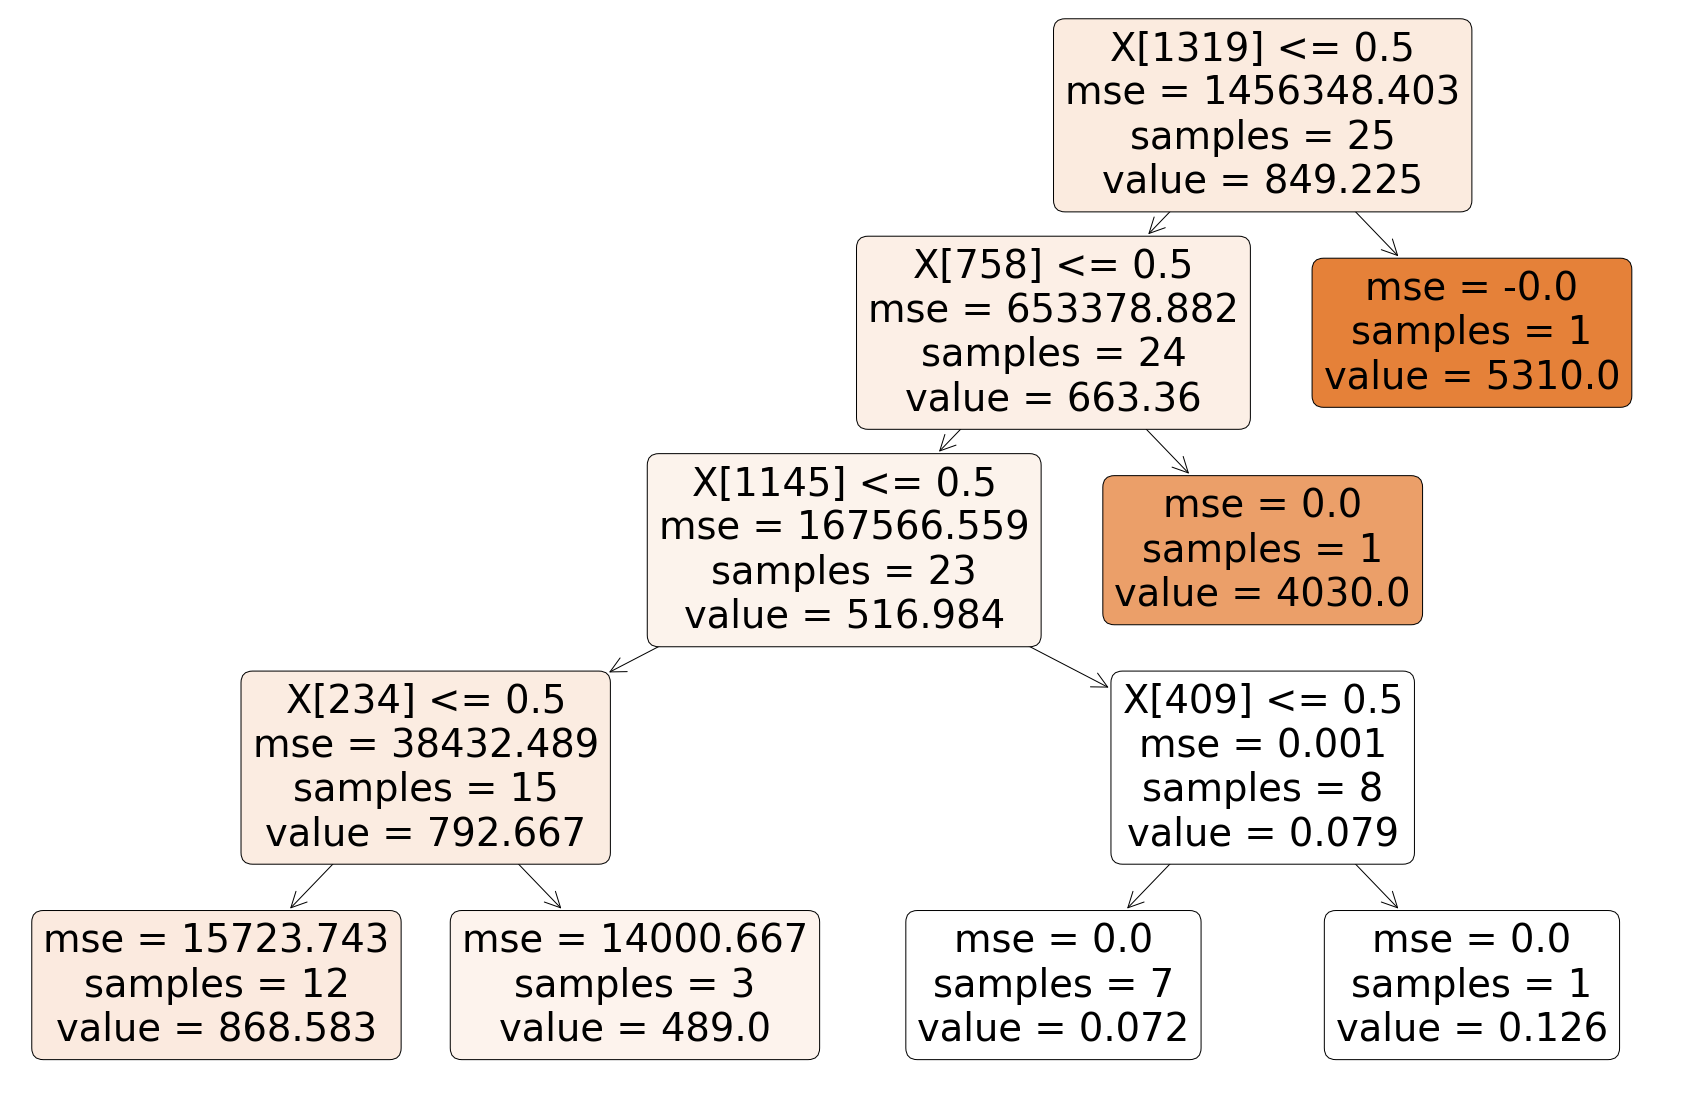

In [61]:
mf2 = pd.read_csv("morgan_fingerprints_extinction.csv")
mf2 = mf2.to_numpy()

X = mf2[1:, 2:-2].astype(np.int) #morgan fingerprints input variable
y = mf2[1:,-1].astype(np.float) #extinction coefficient output variable

tree_clf1 = DecisionTreeRegressor(max_depth=4)
tree_clf1.fit(X, y)

plt.figure(figsize=(30,20))
plot_tree(tree_clf1,
          rounded=True,
          filled=True
)
plt.show()

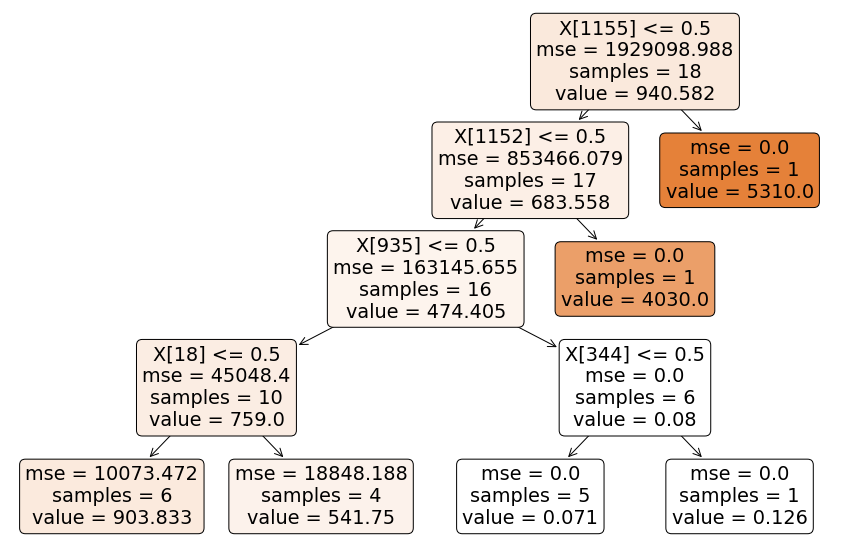

0.9115224699012152

In [62]:
# Fitting a decision tree and reporting a success score

X_train, X_test, y_train, y_test = train_test_split(X, y)
decision_tree = DecisionTreeRegressor(max_depth=4)
decision_tree.fit(X_train, y_train)

plt.figure(figsize=(15,10))
plot_tree(decision_tree,
          rounded=True,
          filled=True
)
plt.show()
decision_tree.score(X_test, y_test)

In [63]:
# Record the scores of 500 Decision trees and get the mean and standard deviation of all scores

scores = []
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    scores += [DecisionTreeRegressor().fit(X_train, y_train).score(X_test, y_test)]
print(np.mean(scores), np.std(scores))

-1.188921793844514 10.24793845294952


In [67]:
# Fit a random forest to the data

X_train, X_test, y_train, y_test = train_test_split(X, y)
random_forest = RandomForestRegressor(n_estimators=500)
random_forest.fit(X_train, y_train)
    
random_forest.score(X_test, y_test)

-0.19296197299228024

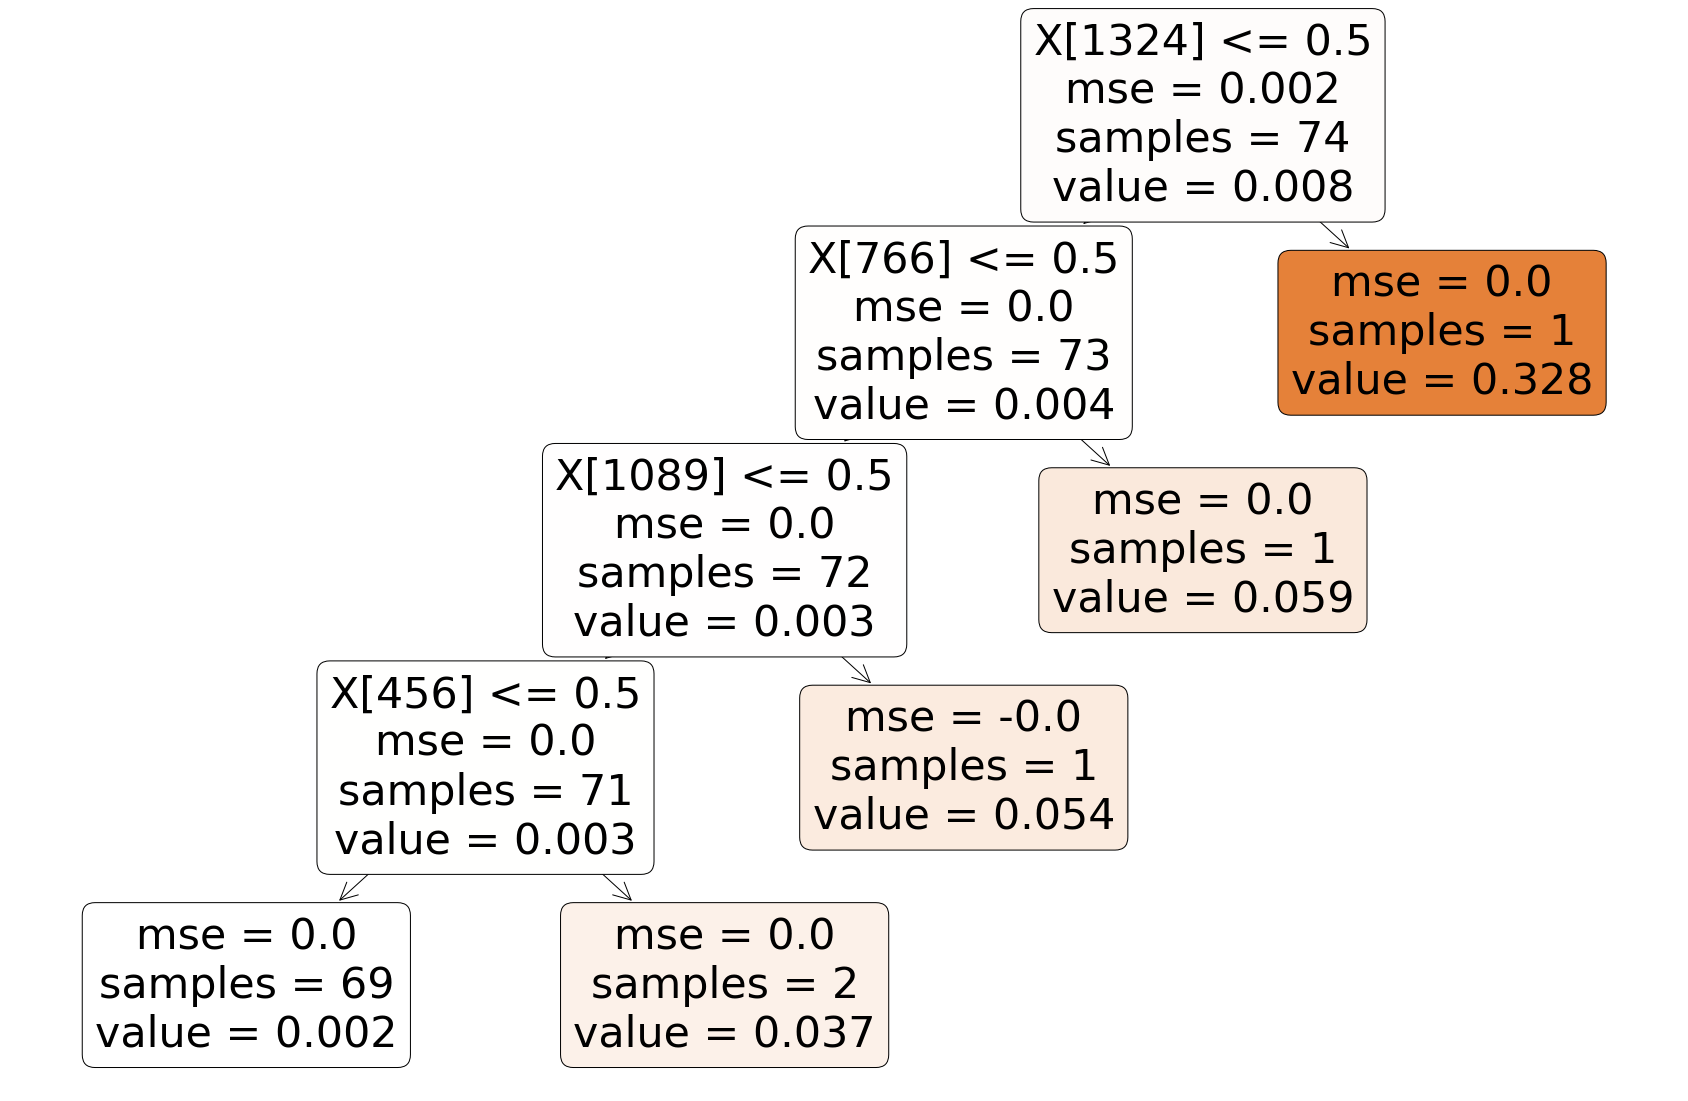

In [66]:
mf3 = pd.read_csv("morgan_fingerprints_isomerisation.csv")
mf3 = mf3.to_numpy()

X1 = mf3[1:, 2:-2].astype(np.int) #morgan fingerprints
y1 = mf3[1:,-1].astype(np.float) #rate of thermal isomerisation from Z-E in s-1

tree_clf1 = DecisionTreeRegressor(max_depth=4)
tree_clf1.fit(X1, y1)

plt.figure(figsize=(30,20))
plot_tree(tree_clf1,
          rounded=True,
          filled=True
)
plt.show()